## Exploratory Data Analysis

The purpose of this project is to show the ability to use Scikit-learn to train and test a linear regression model. We began by using a dataset of home prices from Ames, Iowa from 2006 to 2010 originally compiled by Dean De Cock. The motivation and process for data collection is available __[here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)__.
 
Below we will do some exploratory data analysis to explore our __[cleaned data](https://github.com/kenp8842/ames_homes_proj/blob/master/Ames%20Home%20data%20cleaned.csv)__ from the dataset found __[here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt)__. The data dictionary is available __[here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)__ for ease of explanation of the various columns.

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"C:\Users\kenp8\Documents\ames_homes_proj\Ames Home data cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       

In [153]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0  526301100           20        RL         141.0     31770   Pave       IR1   
1  526350040           20        RH          80.0     11622   Pave       Reg   
2  526351010           20        RL          81.0     14267   Pave       IR1   
3  526353030           20        RL          93.0     11160   Pave       Reg   
4  527105010           60        RL          74.0     13830   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
1          Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
2          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
3          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
4          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      1Story             6             5        1960   
1        Norm      1Fam      1Story             5             6        1961   
2        Norm      1Fam      1Story             6             6        1958   
3        Norm      1Fam      1Story             7             5        1968   
4        Norm      1Fam      2Story             5             5        1997   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1960        Hip   CompShg      BrkFace      Plywood        Stone   
1            1961      Gable   CompShg      VinylSd      VinylSd         None   
2            1958        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
3            1968        Hip   CompShg      BrkFace      BrkFace         None   
4            1998      Gable   CompShg      VinylSd      VinylSd         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         112.0         TA         TA     CBlock        TA        Gd   
1           0.0         TA         TA     CBlock        TA        TA   
2         108.0         TA         TA     CBlock        TA        TA   
3           0.0         Gd         TA     CBlock        TA        TA   
4           0.0         TA         TA      PConc        Gd        TA   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            Gd            BLQ         639.0            Unf           0.0   
1            No            Rec         468.0            LwQ         144.0   
2            No            ALQ         923.0            Unf           0.0   
3            No            ALQ        1065.0            Unf           0.0   
4            No            GLQ         791.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        441.0         1080.0    GasA         Fa           Y      SBrkr   
1        270.0          882.0    GasA         TA           Y      SBrkr   
2        406.0         1329.0    GasA         TA           Y      SBrkr   
3       1045.0         2110.0    GasA         Ex           Y      SBrkr   
4        137.0          928.0    GasA         Gd           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0        1656           0                0         1656             1.0   
1         896           0                0          896             0.0   
2        1329           0                0         1329             0.0   
3        2110           0                0         2110             1.0   
4         928         701                0         1629             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          1          0              3              1   
1             0.0          1          0              2              1   
2             0.0          1          1              3              1   
3             0.0        

Below we will examine the distribution of our target variable `SalePrice`.

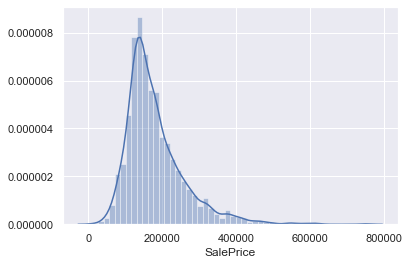

In [154]:
#looking at distribution of our target variable
sns.distplot(df['SalePrice'])

Next we will investigate the `Misc Val` column, examining both the scatter plot and looking at the biggest percentage impacts it has on `SalePrice`. We observe that there are a few houses where the house value is affected by more than an insignificant percentage. 

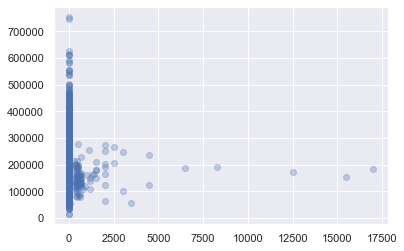

In [155]:
plt.scatter(df['Misc Val'], df['SalePrice'], alpha=.3)

In [156]:
df['misc_pct'] = 100 - 100*(df['SalePrice'] - df['Misc Val'])/df['SalePrice']
pct_xtra_value = df['misc_pct'].unique()

#look at 10 biggest pct
print(sorted(pct_xtra_value, reverse=True)[:17])

[10.231023102310232, 9.246668479738915, 7.267441860465112, 6.36363636363636, 4.368421052631575, 3.5999999999999943, 3.4946236559139834, 3.125, 3.030303030303031, 1.9148936170212778, 1.6273393002441026, 1.2254901960784252, 1.2128562765312267, 1.2072434607645874, 1.1267605633802873, 1.058201058201064, 1.0079999999999956]


We are looking to do a linear regression model and will now look at all the numerical columns and their correlation to `SalePrice`.

In [157]:
numerical_df = transform_df.select_dtypes(include = ['integer', 'float'])
numerical_df.head()

PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  526301100           20         141.0     31770             6             5   
1  526350040           20          80.0     11622             5             6   
2  526351010           20          81.0     14267             6             6   
3  526353030           20          93.0     11160             7             5   
4  527105010           60          74.0     13830             5             5   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0        1960            1960         112.0         639.0           0.0   
1        1961            1961           0.0         468.0         144.0   
2        1958            1958         108.0         923.0           0.0   
3        1968            1968           0.0        1065.0           0.0   
4        1997            1998           0.0         791.0           0.0   

   Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0        441.0         1080.0        1656           0                0   
1        270.0          882.0         896           0                0   
2        406.0         1329.0        1329           0                0   
3       1045.0         2110.0        2110           0                0   
4        137.0          928.0         928         701                0   

   Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
0         1656             1.0             0.0          1          0   
1          896             0.0             0.0          1          0   
2         1329             0.0             0.0          1          1   
3         2110             1.0             0.0          2          1   
4         1629             0.0             0.0          2          1   

   Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  \
0              3              1              7           2         1960.0   
1              2              1              5           0         1961.0   
2              3              1              6           0         1958.0   
3              3              1              8           2         1968.0   
4              3              1              6           1         1997.0   

   Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0          2.0        528.0           210             62               0   
1          1.0        730.0           140              0               0   
2          1.0        312.0           393             36               0   
3          2.0        522.0             0              0               0   
4          2.0        482.0           212             34               0   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  \
0           0             0          0         0        5     2010     215000   
1           0           120          0         0        6     2010     105000   
2           0             0          0     12500        6     2010     172000   
3           0             0          0         0        4     2010     244000   
4           0             0          0         0        3     2010     189900   

   misc_pct  
0  0.000000  
1  0.000000  
2  7.267442  
3  0.000000  
4  0.000000

In [158]:
num_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
num_corr_coeffs

BsmtFin SF 2       0.006018
Misc Val           0.015691
Yr Sold            0.030569
3Ssn Porch         0.032225
misc_pct           0.034855
Mo Sold            0.035259
Bsmt Half Bath     0.035817
Low Qual Fin SF    0.037660
Pool Area          0.068403
MS SubClass        0.085092
Overall Cond       0.101697
Screen Porch       0.112151
Kitchen AbvGr      0.119814
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.183308
PID                0.246521
Garage Yr Blt      0.253459
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.275823
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.333292
BsmtFin SF 1       0.433147
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.502196
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632529
Garage Area        0.640138
Garage Cars        0

In [159]:
hi_corr = num_corr_coeffs[num_corr_coeffs > .45]
hi_corr

Fireplaces        0.474558
TotRms AbvGrd     0.495474
Mas Vnr Area      0.502196
Year Remod/Add    0.532974
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Total Bsmt SF     0.632529
Garage Area       0.640138
Garage Cars       0.647812
Gr Liv Area       0.706780
Overall Qual      0.799262
SalePrice         1.000000
Name: SalePrice, dtype: float64

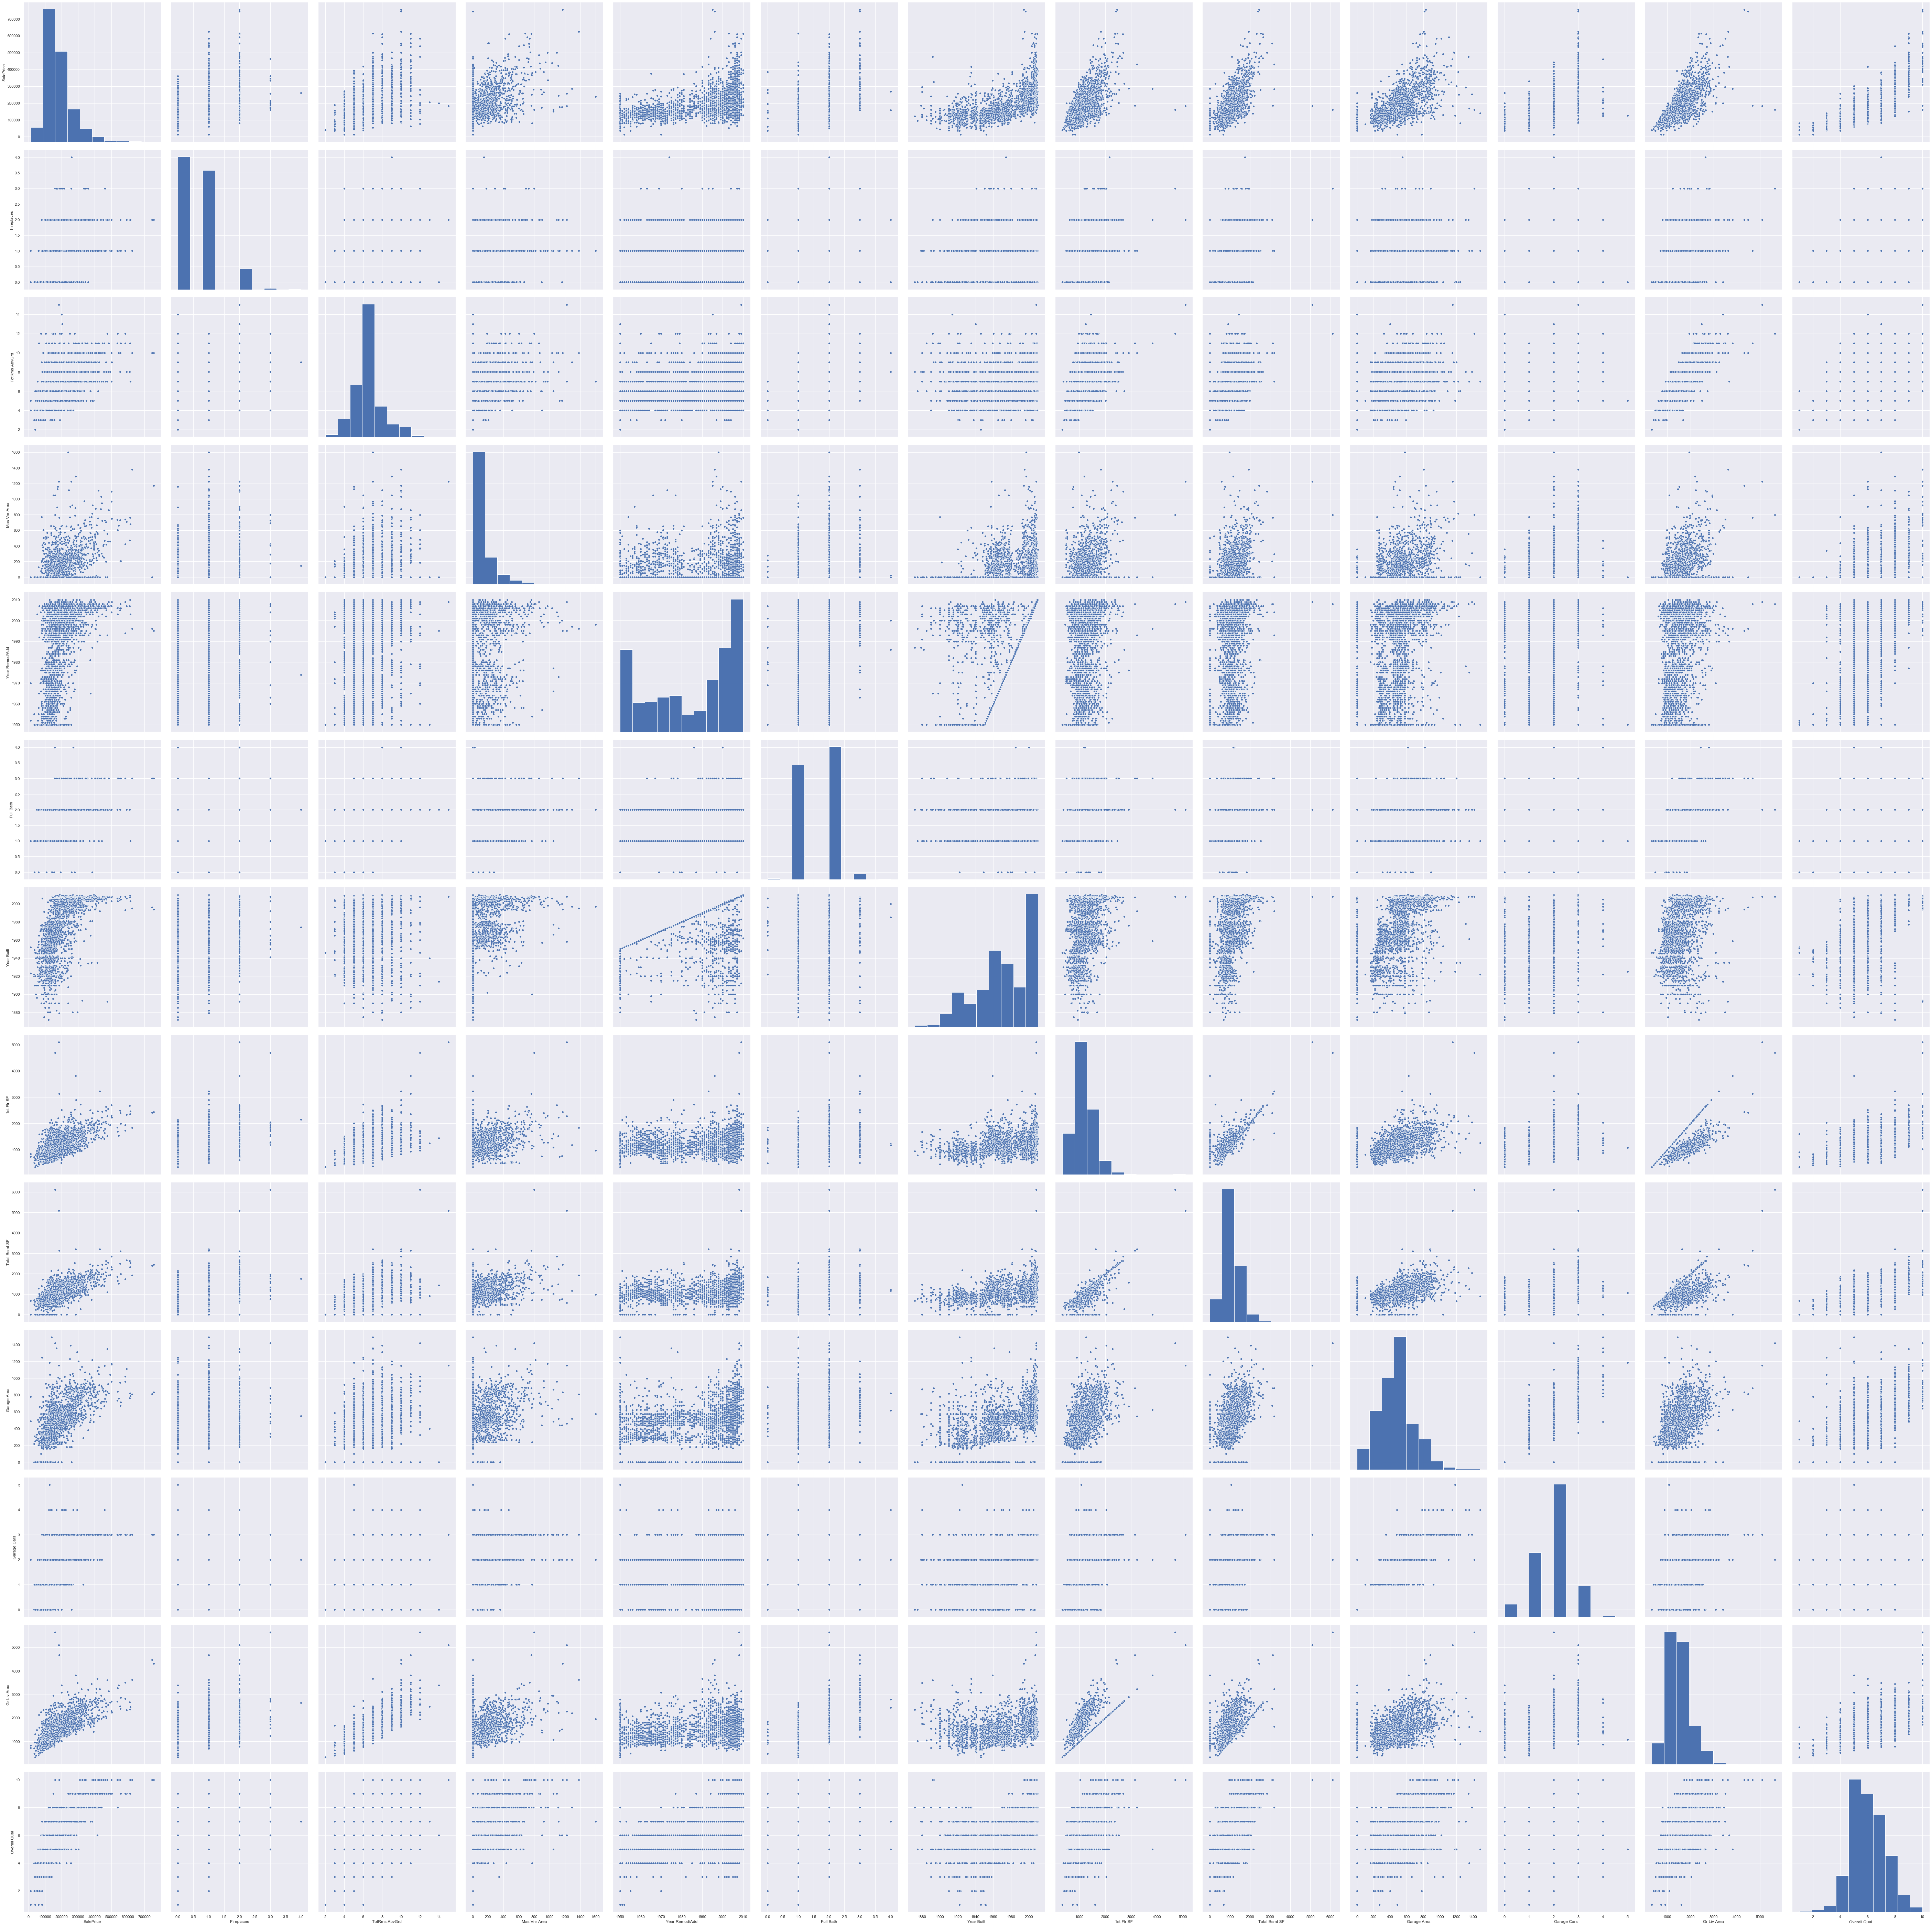

In [160]:
sns.set()
cols = ['SalePrice', 'Fireplaces', 'TotRms AbvGrd', 'Mas Vnr Area', 'Year Remod/Add', 'Full Bath', 'Year Built',
          '1st Flr SF', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area', 'Overall Qual']
sns.pairplot(numerical_df[cols], height = 6)
plt.show();

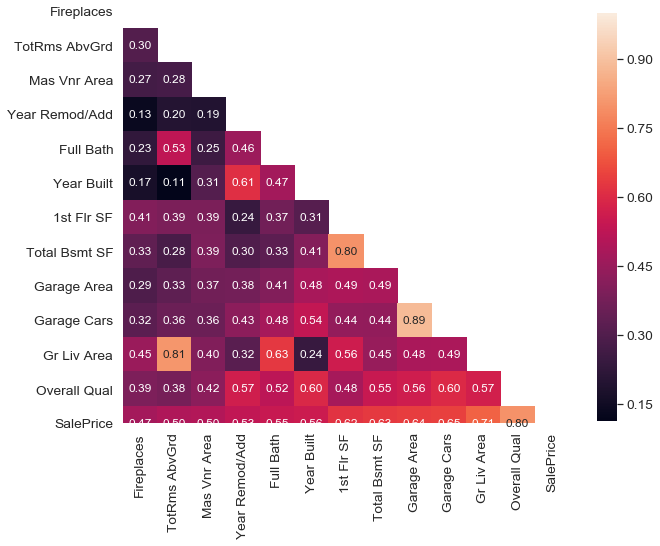

In [161]:
#checking strong correlation between features
plt.figure(figsize =(10,10))
corrmat = numerical_df[hi_corr.index].corr().abs()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 1.25)
with sns.axes_style('white'):
    ax = sns.heatmap(corrmat, mask=mask, annot=True, fmt='.2f', annot_kws ={'size':12}, 
                     cbar_kws={'shrink': .75}, square=True)
plt.show()

We can clearly see that square footage (`Gr Liv Area` and `Total Bsmt SF`) and `Overall Qual` are very correlated to a home's sale price. The garage columns as well as the year columns also have a good correlation with home price. The number of rooms in a home also looks correlated, unfortunately in this dataset we do not have the ability to determine the number of bedrooms or overall rooms as the only basement rooms that are listed are bathrooms.

There is not a lot of collinearity between possible features other than some easily assumed ones. The `TotRms AbvGrnd` and `Gr Liv Area` relate to above ground rooms and square footage, basement square footage and first floor square footage, `Garage Area` and `Garage Cars`, and `Garage Yr Blt` with `Year Built` are all pairs that have a extremely high correlation.

Now we will investigate our ordinal columns to examine which ones may be useful for our model.

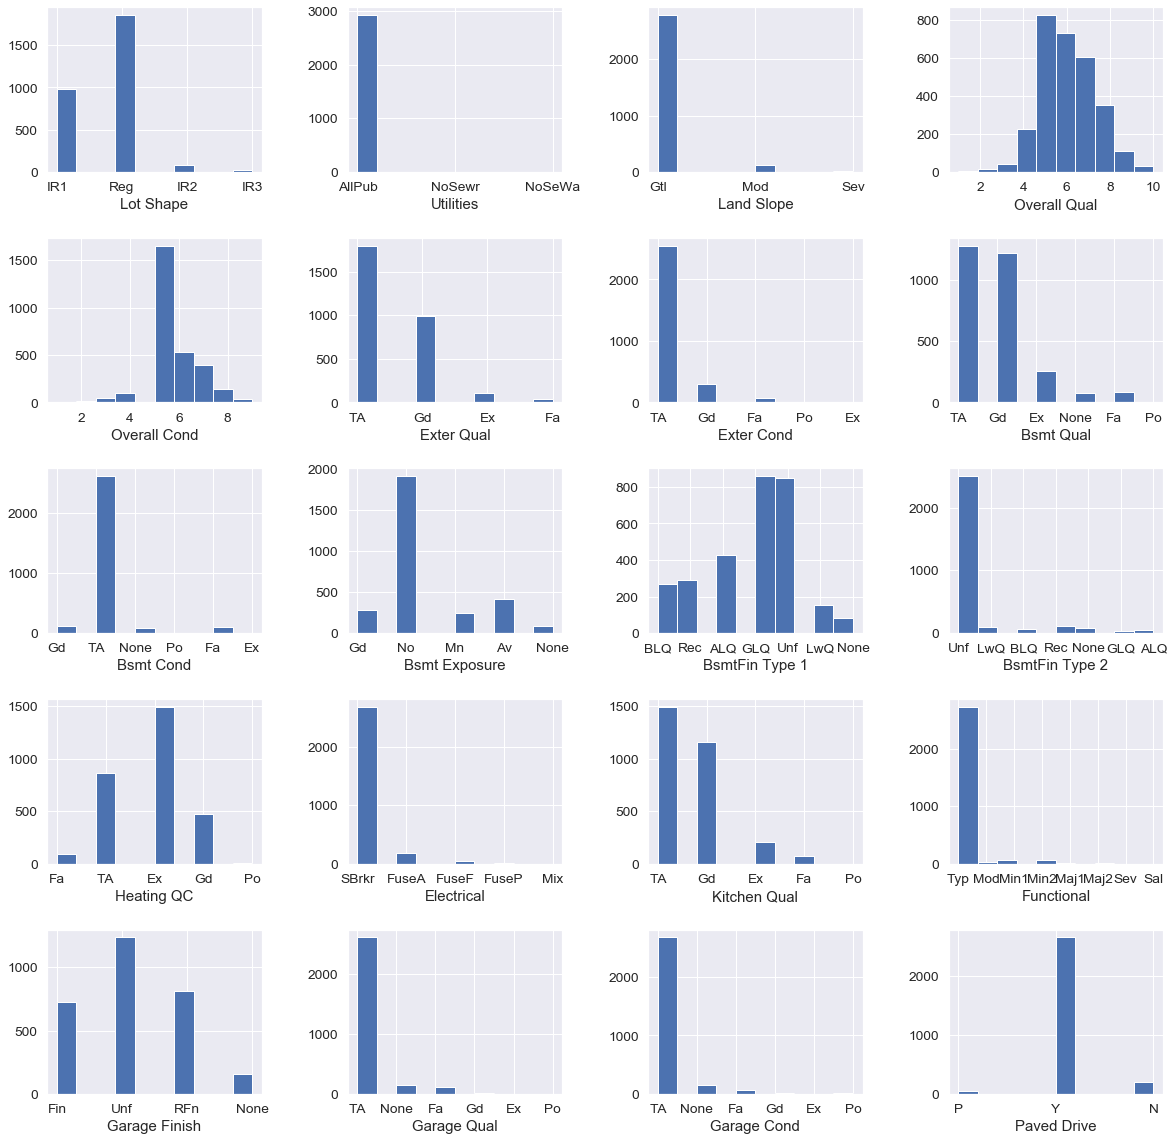

In [162]:
ordinal_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
               'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical',
               'Kitchen Qual', 'Functional', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=.4, wspace=.4)
for i in range (1,21):
    ax=fig.add_subplot(5, 4, i)
    ax.hist(df[ordinal_cols[i-1]])
    ax.set_xlabel(ordinal_cols[i-1])
plt.show()

We can see above that `Overall Qual` represents the best candidate for a feature in our model, significantly better than `Overall Cond` which would be similar. It has a good distribution and multiple categories. `BsmtFin Type 1` would also fall into this category; however, it would duplicate to a certain extent as the basement quality is already included with the `Overall Qual` column. Garage finish has a good spread of values, but it only has four different categories making it less than ideal for our model.

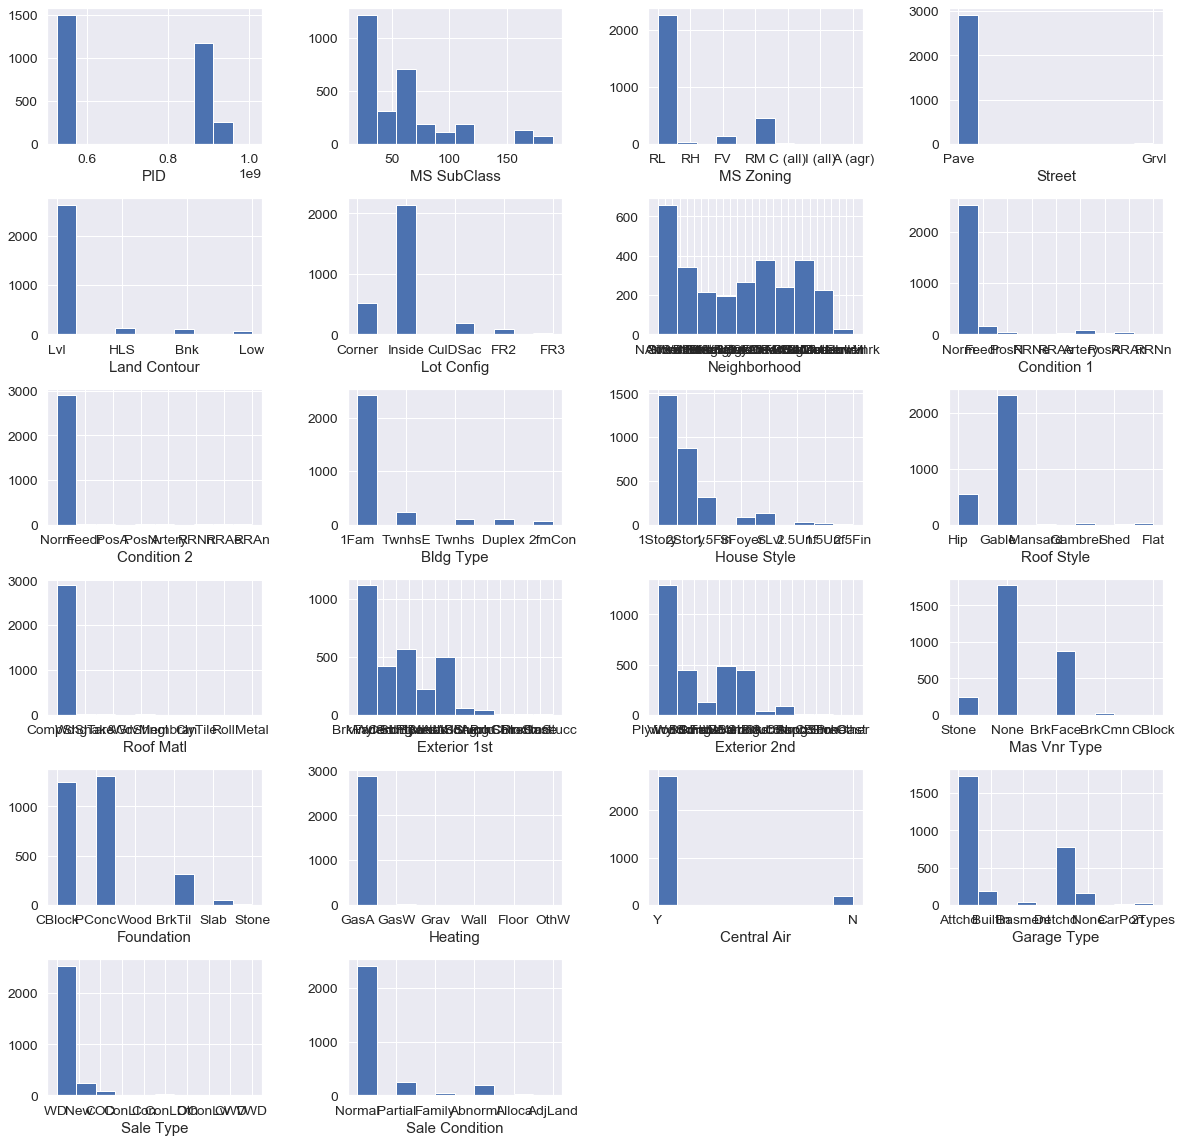

In [163]:
nominal_cols = ['PID', 'MS SubClass', 'MS Zoning', 'Street',
                    'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
                    'Condition 2', 'Bldg Type', 'House Style','Roof Style',
                    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                    'Foundation','Heating', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=.4, wspace=.4)
for i in range (1,23):
    ax=fig.add_subplot(6, 4, i)
    ax.hist(df[nominal_cols[i-1]])
    ax.set_xlabel(nominal_cols[i-1])
plt.show()

Here `Neighborhood` looks like the best candidate for our model by having good variability. `MS SubClass`, `Exterior 1st` and `Exterior 2nd` are also possibilities to include, although less desirable.